1. Lib Yang Saya Gunakan    

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

2. Memasukan Datasheet dengan pandas

In [26]:
stunting_data = pd.read_excel('data-stunting.xlsx')
stunting_data


,No,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,...,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA,KASUS UNDERWEIGHT BARU,KASUS STUNTING BARU,KASUS WASTING BARU
0,NaN,3603180503210003,SAHRUL ULUM,L,2021-03-05,3.1,47,AHMAD SAEPUDIN,BANTEN,TANGERANG,...,Gizi Kurang,-2.91,O,-,1.0,-,-,BARU,-,-
1,NaN,3603185104210001,GENDIS,P,2021-04-11,3.3,47,RONAL,BANTEN,TANGERANG,...,Gizi Baik,-1.60,N,-,1.0,-,-,BARU,-,-
2,NaN,3603185711200004,SITI ZAKIYAH,P,2020-11-17,3.3,50,JENUS SOLIHIN,BANTEN,TANGERANG,...,Gizi Baik,-1.37,N,-,1.0,-,-,BARU,-,-
3,NaN,3603181803210004,KANIA OTAVIANI,P,2021-10-26,2.8,47,RIAN. H. / NURHAYANI,BANTEN,TANGERANG,...,Gizi Baik,-1.61,O,-,1.0,-,-,BARU,-,-
4,NaN,3603184606210004,KAIFA,L,2021-06-04,3,50.1,AHMAD RIFAI/ADE.F,BANTEN,TANGERANG,...,Gizi Baik,-1.33,N,-,1.0,-,-,BARU,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,NaN,3603182212220001,KENZYO BRYAN,L,2022-12-22,3.3,50,BERLYAN SAPUTRA,BANTEN,TANGERANG,...,Gizi Baik,-1.78,T,-,1.0,-,-,NaN,NaN,NaN
4835,NaN,3603300702232314,MUHAMMAD FADLAN ABIDIN,L,2023-02-07,4.9,50,mukti wilanggeng,BANTEN,TANGERANG,...,Gizi Baik,-1.02,T,-,1.0,-,-,NaN,NaN,NaN
4836,NaN,3603301202234869,MUHAMMAD BILAL SYAPUTRA,L,2023-02-12,3.2,50.1,DEDE ILHAM FAUZI,BANTEN,TANGERANG,...,Gizi Baik,-0.81,T,-,1.0,-,-,NaN,NaN,NaN
4837,NaN,3603181304230001,MUHAMMAD ALVAN ADITHAMA,L,2023-04-13,2.9,50,budiman,BANTEN,TANGERANG,...,Gizi Baik,0.18,T,-,1.0,-,-,NaN,NaN,NaN


In [27]:
#cek value pada atribut target
stunting_data['BB/TB'].value_counts()

BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
Name: count, dtype: int64

In [28]:

# Misalkan stunting_data adalah DataFrame Anda
# Pilih hanya kolom 'BB/TB'
bb_tb_column = stunting_data['BB/TB']

# Hapus missing values dari kolom 'BB/TB'
bb_tb_cleaned = bb_tb_column.dropna()

# Menampilkan jumlah nilai setelah menghapus missing values
print(f"Jumlah nilai setelah menghapus missing values: {len(bb_tb_cleaned)}")

# Menampilkan nilai unik setelah membersihkan missing values
print(f"Nilai unik setelah membersihkan missing values:\n{bb_tb_cleaned.value_counts()}")

Jumlah nilai setelah menghapus missing values: 4814
Nilai unik setelah membersihkan missing values:
BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
Name: count, dtype: int64


In [29]:
# Get Location Index data
def get_index(element):
    return stunting_data.columns.get_loc(element)

In [30]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Misalkan stunting_data adalah DataFrame Anda

# Memilih fitur yang ingin diproses
feature = stunting_data.iloc[:, [get_index("Berat"), get_index("Tinggi"), get_index("BB/U"), get_index("TB/U"), get_index("BB/TB"), get_index("JK")]] 

# Menghapus baris dengan nilai kosong atau null
feature = feature.dropna()

# Mentransformasikan kolom-kolom yang diperlukan
label_encoder = LabelEncoder()

feature["JK"] = label_encoder.fit_transform(feature["JK"].astype("str"))
feature["BB/U"] = label_encoder.fit_transform(feature["BB/U"].astype("str"))
feature["TB/U"] = label_encoder.fit_transform(feature["TB/U"].astype("str"))
feature["BB/TB"] = label_encoder.fit_transform(feature["BB/TB"].astype("str"))

# Menampilkan informasi data
print(feature.head())
print(feature.info())



   Berat  Tinggi  BB/U  TB/U  BB/TB  JK
0    9.7    87.0     3     1      2   0
1   10.2    86.3     1     0      0   1
2   11.0    89.0     1     0      0   1
3    9.4    82.6     1     0      0   1
4    9.8    81.7     1     2      0   0
<class 'pandas.core.frame.DataFrame'>
Index: 4808 entries, 0 to 4838
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Berat   4808 non-null   float64
 1   Tinggi  4808 non-null   float64
 2   BB/U    4808 non-null   int32  
 3   TB/U    4808 non-null   int32  
 4   BB/TB   4808 non-null   int32  
 5   JK      4808 non-null   int32  
dtypes: float64(2), int32(4)
memory usage: 187.8 KB
None


BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
0    4429
2     166
5     122
3      48
4      27
6      25
1      22

In [10]:
label_encoder = LabelEncoder()
feature["BB/TB"] = label_encoder.fit_transform(feature["BB/TB"])

# Menampilkan ringkasan nilai kategorikal
print("Ringkasan nilai kategorikal:")
print(feature["BB/TB"].value_counts())

Ringkasan nilai kategorikal:
BB/TB
0    4425
2     165
5     122
3      48
4      26
1      22
Name: count, dtype: int64


BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
Ringkasan nilai kategorikal:
BB/TB
0    4425
2     165
5     122
3      48
4      26
1      22
Name: count, dtype: int64

In [31]:
np.sum(pd.isnull(feature).sum()) # Sum of the count of null objects in all columns of data frame

0

In [32]:
print(feature.isnull().sum())

Berat     0
Tinggi    0
BB/U      0
TB/U      0
BB/TB     0
JK        0
dtype: int64


In [33]:
feature.describe()

,Berat,Tinggi,BB/U,TB/U,BB/TB,JK
count,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000
mean,12.614848,91.742159,0.135607,0.085067,0.251664,0.445507
std,2.756676,11.431809,0.462351,0.379473,0.943096,0.497073
min,2.800000,49.000000,0.000000,0.000000,0.000000,0.000000
25%,10.800000,84.500000,0.000000,0.000000,0.000000,0.000000
50%,13.100000,95.000000,0.000000,0.000000,0.000000,0.000000
75%,14.500000,101.000000,0.000000,0.000000,0.000000,1.000000
max,30.000000,119.000000,3.000000,3.000000,5.000000,1.000000


In [34]:
print(feature.isnull().sum())

Berat     0
Tinggi    0
BB/U      0
TB/U      0
BB/TB     0
JK        0
dtype: int64


In [35]:
label = feature["BB/TB"]
feature_1 = feature.drop(columns=['BB/TB'])
feature_1.head()

,Berat,Tinggi,BB/U,TB/U,JK
0,9.7,87.0,3,1,0
1,10.2,86.3,1,0,1
2,11.0,89.0,1,0,1
3,9.4,82.6,1,0,1
4,9.8,81.7,1,2,0


In [36]:
label = feature["BB/TB"]
value_counts = label.value_counts()
print(value_counts)


BB/TB
0    4425
2     165
5     122
3      48
4      26
1      22
Name: count, dtype: int64


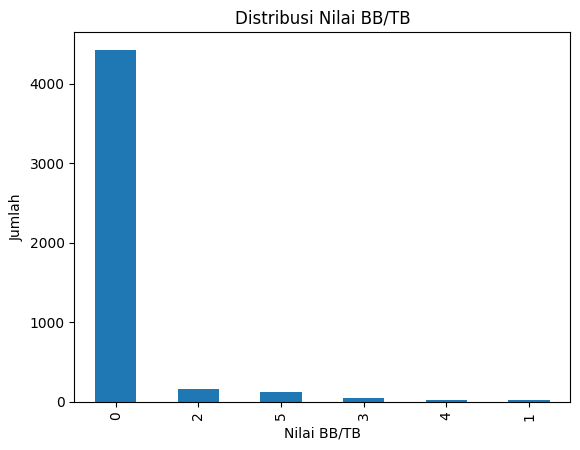

In [37]:
import matplotlib.pyplot as plt

label.value_counts().plot(kind='bar')
plt.title('Distribusi Nilai BB/TB')
plt.xlabel('Nilai BB/TB')
plt.ylabel('Jumlah')
plt.show()


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_norm = scaler.fit_transform(feature_1)
feature_norm = pd.DataFrame(feature_norm, columns=feature_1.columns)
feature_norm

,Berat,Tinggi,BB/U,TB/U,JK
0,0.253676,0.542857,1.000000,0.333333,0.0
1,0.272059,0.532857,0.333333,0.000000,1.0
2,0.301471,0.571429,0.333333,0.000000,1.0
3,0.242647,0.480000,0.333333,0.000000,1.0
4,0.257353,0.467143,0.333333,0.666667,0.0
...,...,...,...,...,...
4803,0.205882,0.385714,0.000000,0.000000,0.0
4804,0.209559,0.352857,0.000000,0.000000,0.0
4805,0.216912,0.357143,0.000000,0.000000,0.0
4806,0.227941,0.328571,0.000000,0.000000,0.0


In [39]:
# Periksa kolom dalam dataframe
print(feature_norm.columns)


Index(['Berat', 'Tinggi', 'BB/U', 'TB/U', 'JK'], dtype='object')


In [40]:
feature_norm["BB/TB"] = label
feature_norm

,Berat,Tinggi,BB/U,TB/U,JK,BB/TB
0,0.253676,0.542857,1.000000,0.333333,0.0,2.0
1,0.272059,0.532857,0.333333,0.000000,1.0,0.0
2,0.301471,0.571429,0.333333,0.000000,1.0,0.0
3,0.242647,0.480000,0.333333,0.000000,1.0,0.0
4,0.257353,0.467143,0.333333,0.666667,0.0,0.0
...,...,...,...,...,...,...
4803,0.205882,0.385714,0.000000,0.000000,0.0,0.0
4804,0.209559,0.352857,0.000000,0.000000,0.0,0.0
4805,0.216912,0.357143,0.000000,0.000000,0.0,0.0
4806,0.227941,0.328571,0.000000,0.000000,0.0,0.0


C:\Users\User\AppData\Local\Temp\ipykernel_7832\2779333750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature_norm['BB/TB'],data=feature_norm,palette='RdBu_r')


<Axes: xlabel='BB/TB', ylabel='count'>

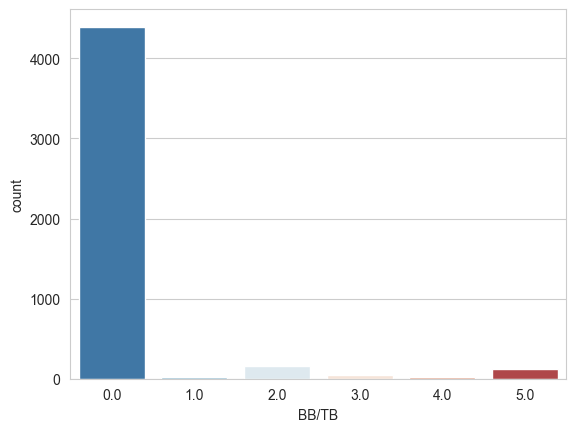

In [46]:
sns.set_style('whitegrid')
sns.countplot(x=feature_norm['BB/TB'],data=feature_norm,palette='RdBu_r')

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(sampling_strategy={ 1:1000,2: 1000, 3: 1000, 4: 1000, 5:1000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(feature_norm.drop(columns=['BB/TB'])
, feature_norm['BB/TB'])
print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_resampled))

Jumlah sampel per kelas setelah SMOTE: Counter({0.0: 4395, 2.0: 1000, 1.0: 1000, 5.0: 1000, 4.0: 1000, 3.0: 1000})


C:\Users\User\AppData\Local\Temp\ipykernel_7832\3594647708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled,data=X_resampled,palette='RdBu_r')


<Axes: xlabel='BB/TB', ylabel='count'>

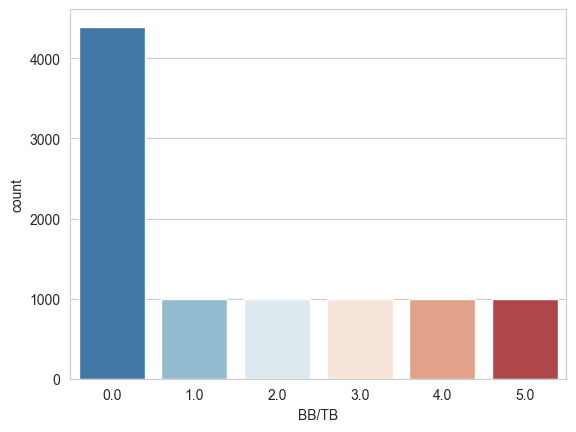

In [48]:
sns.set_style('whitegrid')
sns.countplot(x=y_resampled,data=X_resampled,palette='RdBu_r')

In [49]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


RandomUnderSampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = RandomUnderSampler.fit_resample(X_resampled
, y_resampled)
print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_resampled))

Jumlah sampel per kelas setelah SMOTE: Counter({0.0: 1000, 1.0: 1000, 2.0: 1000, 3.0: 1000, 4.0: 1000, 5.0: 1000})


C:\Users\User\AppData\Local\Temp\ipykernel_7832\3560117907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled,data=X_resampled,palette='RdBu_r')


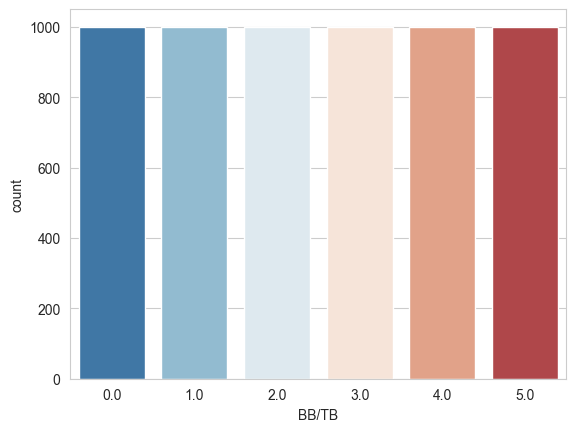

In [50]:
sns.set_style('whitegrid')
sns.countplot(x=y_resampled,data=X_resampled,palette='RdBu_r')
X_resampled.columns[0:10]
X_resampled['BB/TB']= y_resampled

C:\Users\User\AppData\Local\Temp\ipykernel_7832\277686819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
C:\Users\User\AppData\Local\Temp\ipykernel_7832\277686819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
C:\Users\User\AppData\Local\Temp\ipykernel_7832\277686819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
C:\Users\User\AppData\Local\Temp\ipykernel_7832\277686819.py:3: Fut

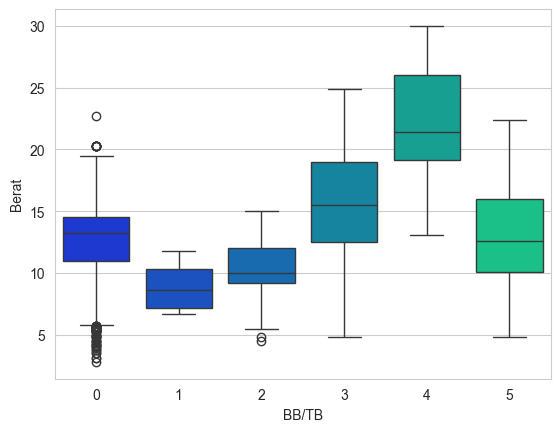

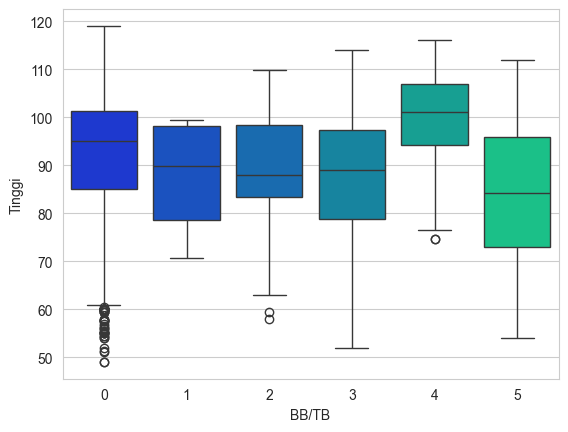

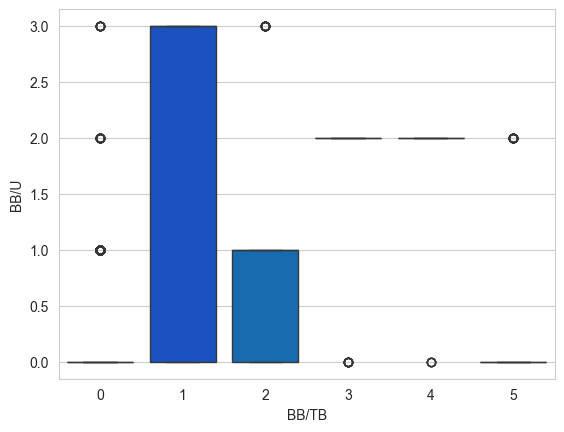

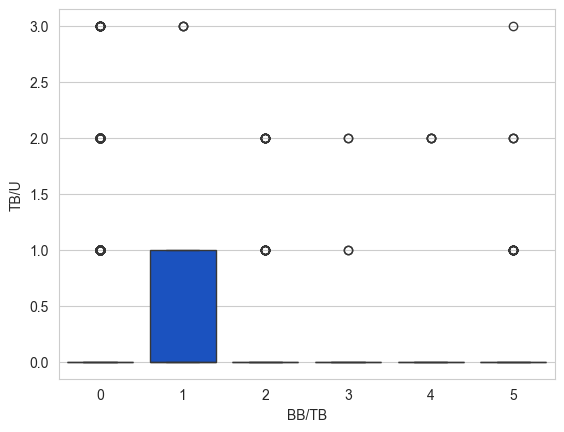

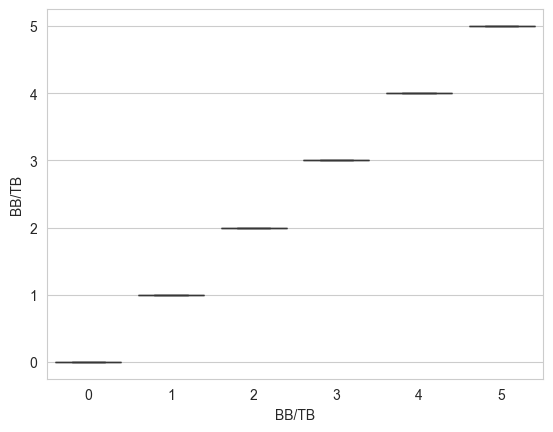

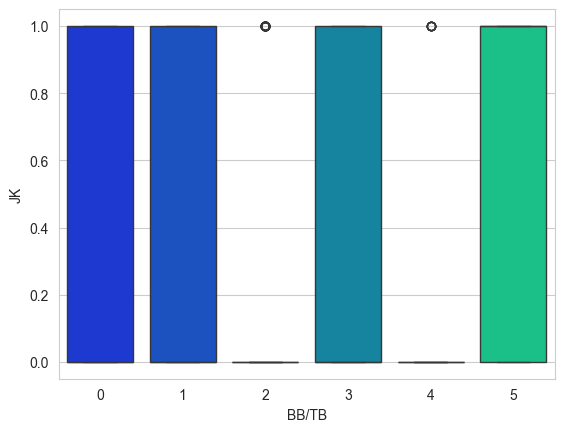

<Figure size 640x480 with 0 Axes>

In [51]:
l=list(feature.columns[0:10])
for i in range(len(l)):
    sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
    plt.figure()

distribusi variabel numerik (y) dalam hubungannya dengan variabel kategori (x) yang ditentukan oleh kolom 'BB/TB' dalam DataFrame feature.

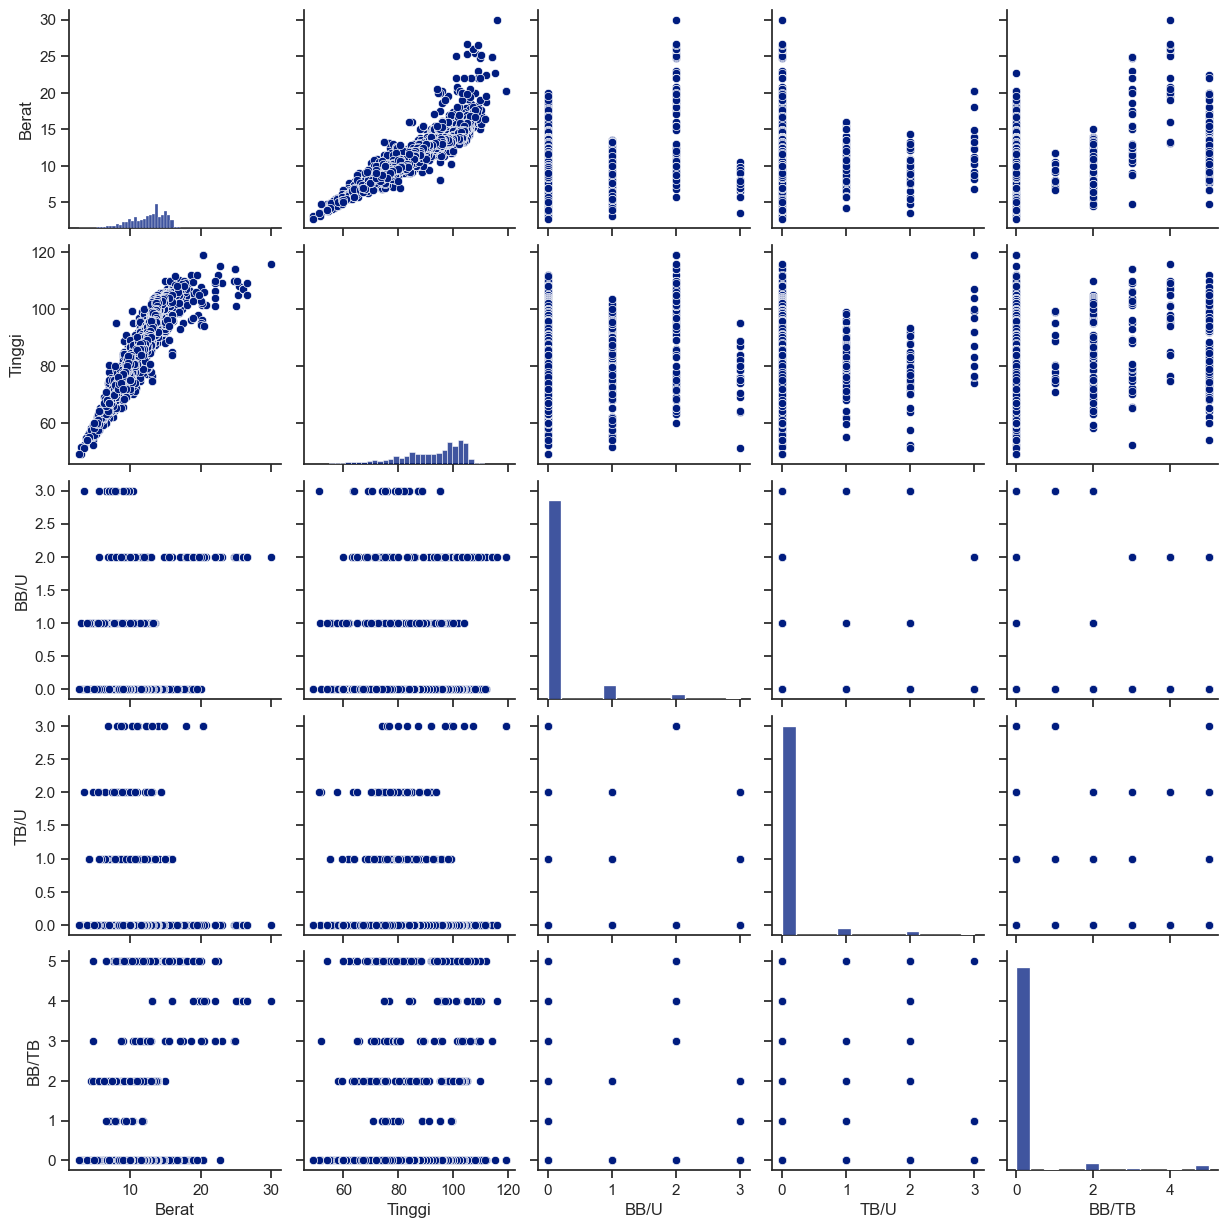

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.set_palette("dark") 

sns.pairplot(feature, vars=['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/TB'])

plt.show()


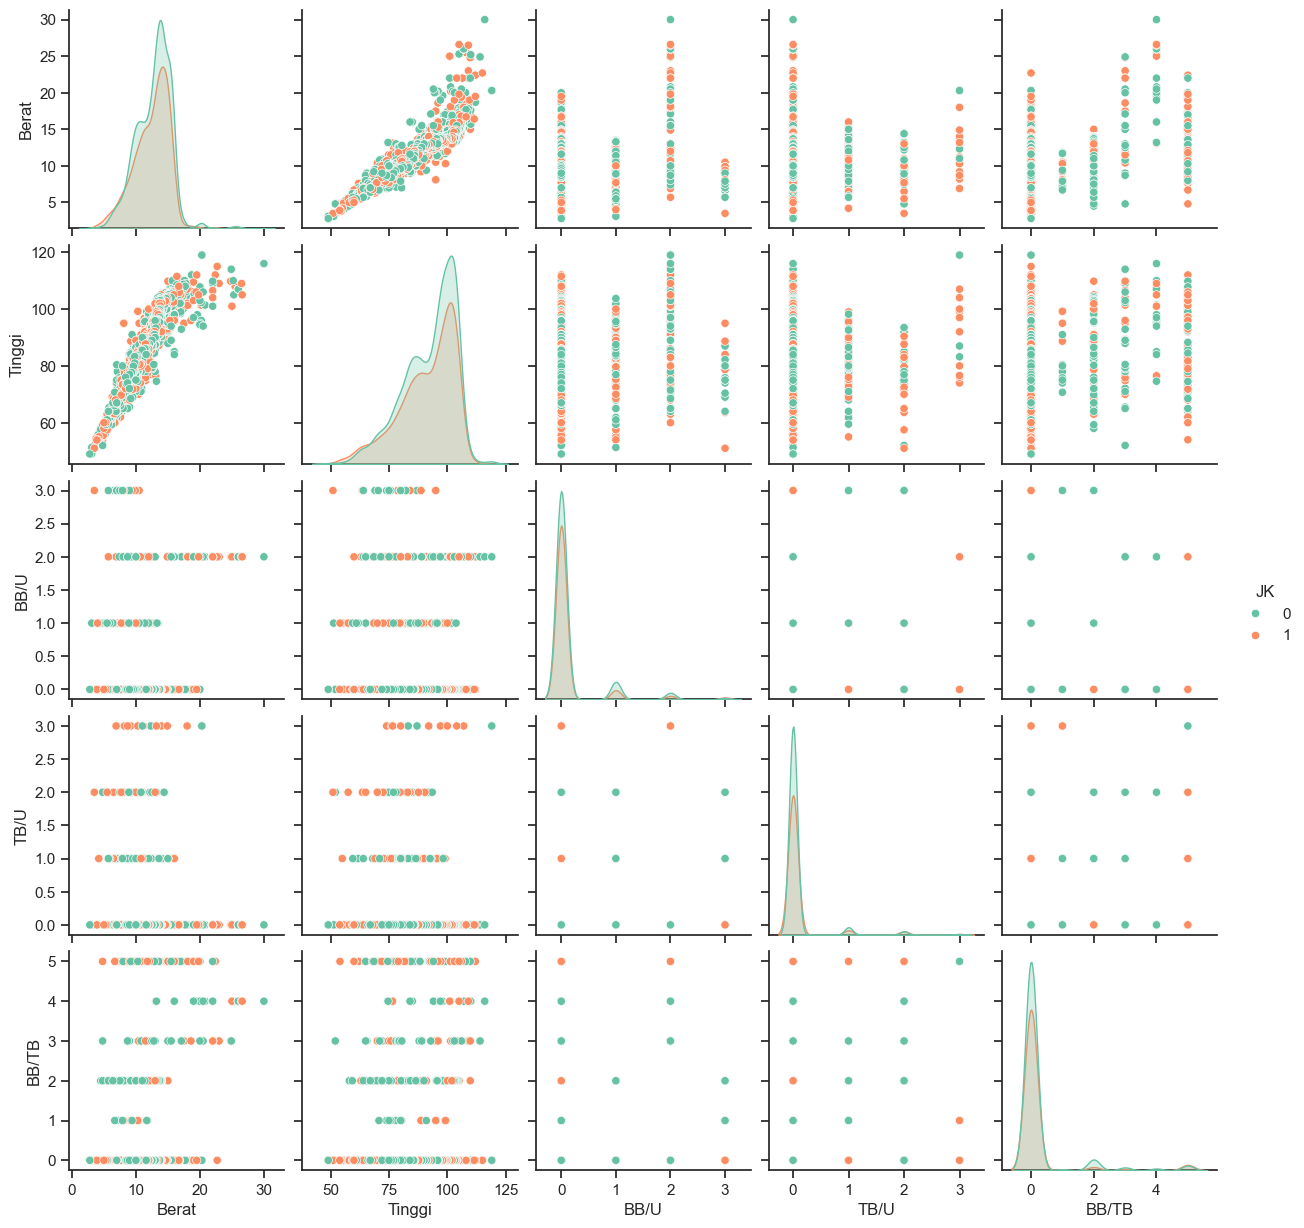

In [53]:
sns.pairplot(feature, hue='JK', vars=['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/TB'], palette='Set2')


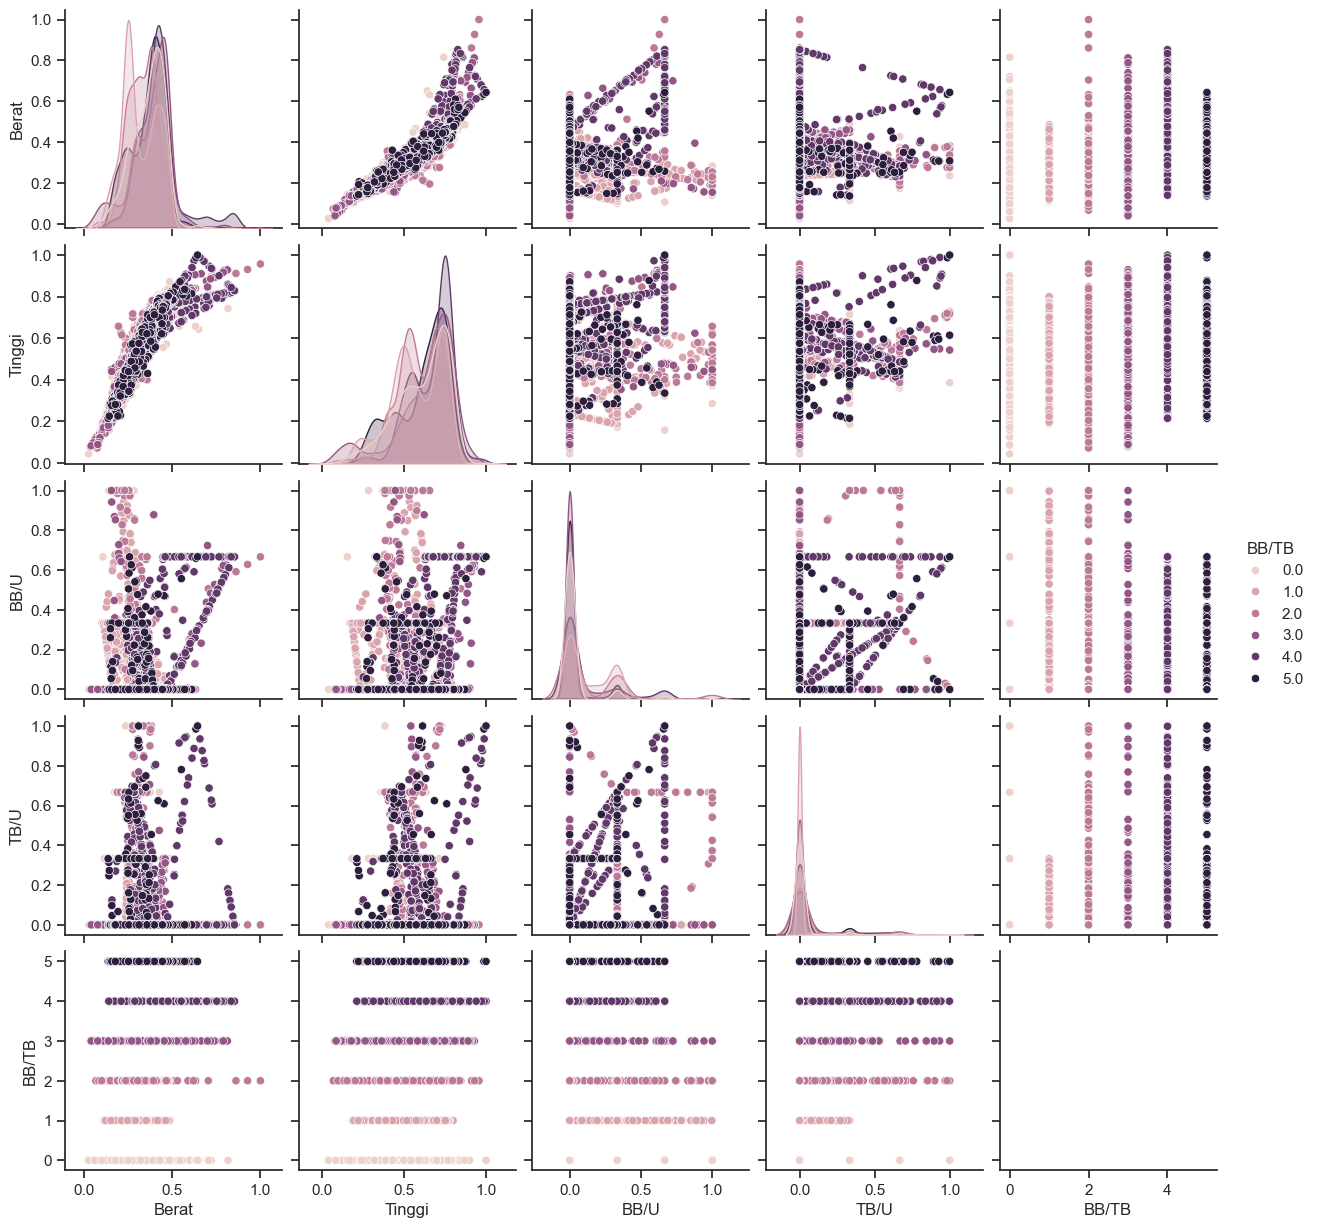

In [54]:
sns.pairplot(X_resampled, hue = 'BB/TB',vars = ['Berat','Tinggi','BB/U','TB/U', 'BB/TB'] )


X_resampled: Dataset yang sudah dire-sampling (misalnya, menggunakan SMOTE) yang berisi fitur-fitur yang ingin kita bandingkan.
hue='BB/TB': Parameter ini memberikan warna pada pairplot berdasarkan kategori dalam kolom 'BB/TB'. Setiap kategori akan ditandai dengan warna yang berbeda.
vars=['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/TB']: Daftar variabel yang akan dibandingkan secara berpasangan untuk membuat pairplot.


<Axes: >

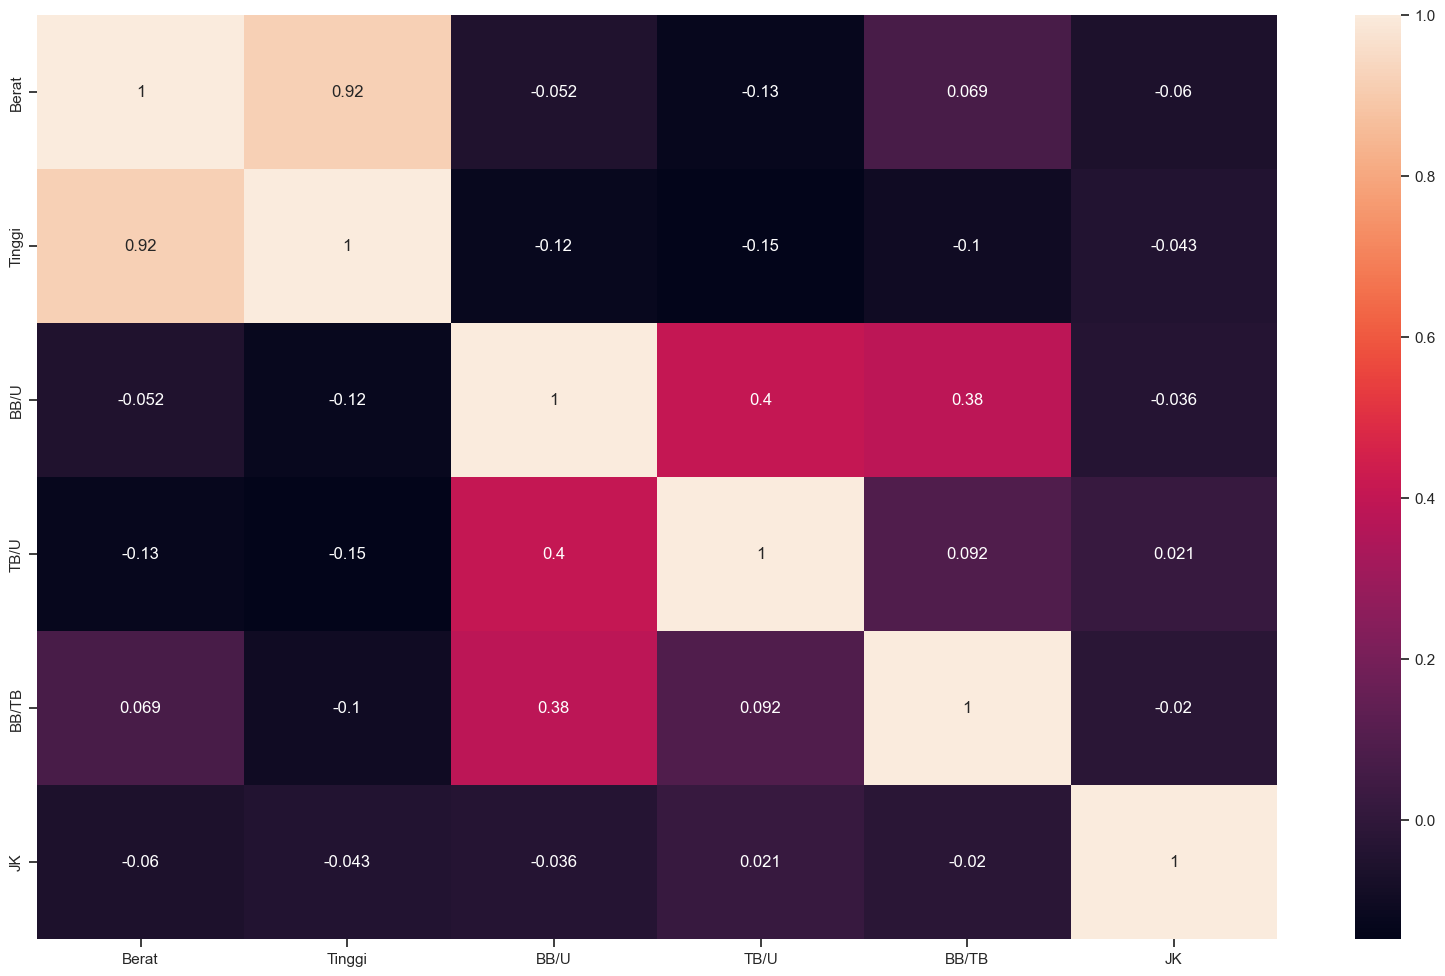

In [55]:
plt.figure(figsize=(20,12))
sns.heatmap(feature.corr(), annot=True)

<Axes: >

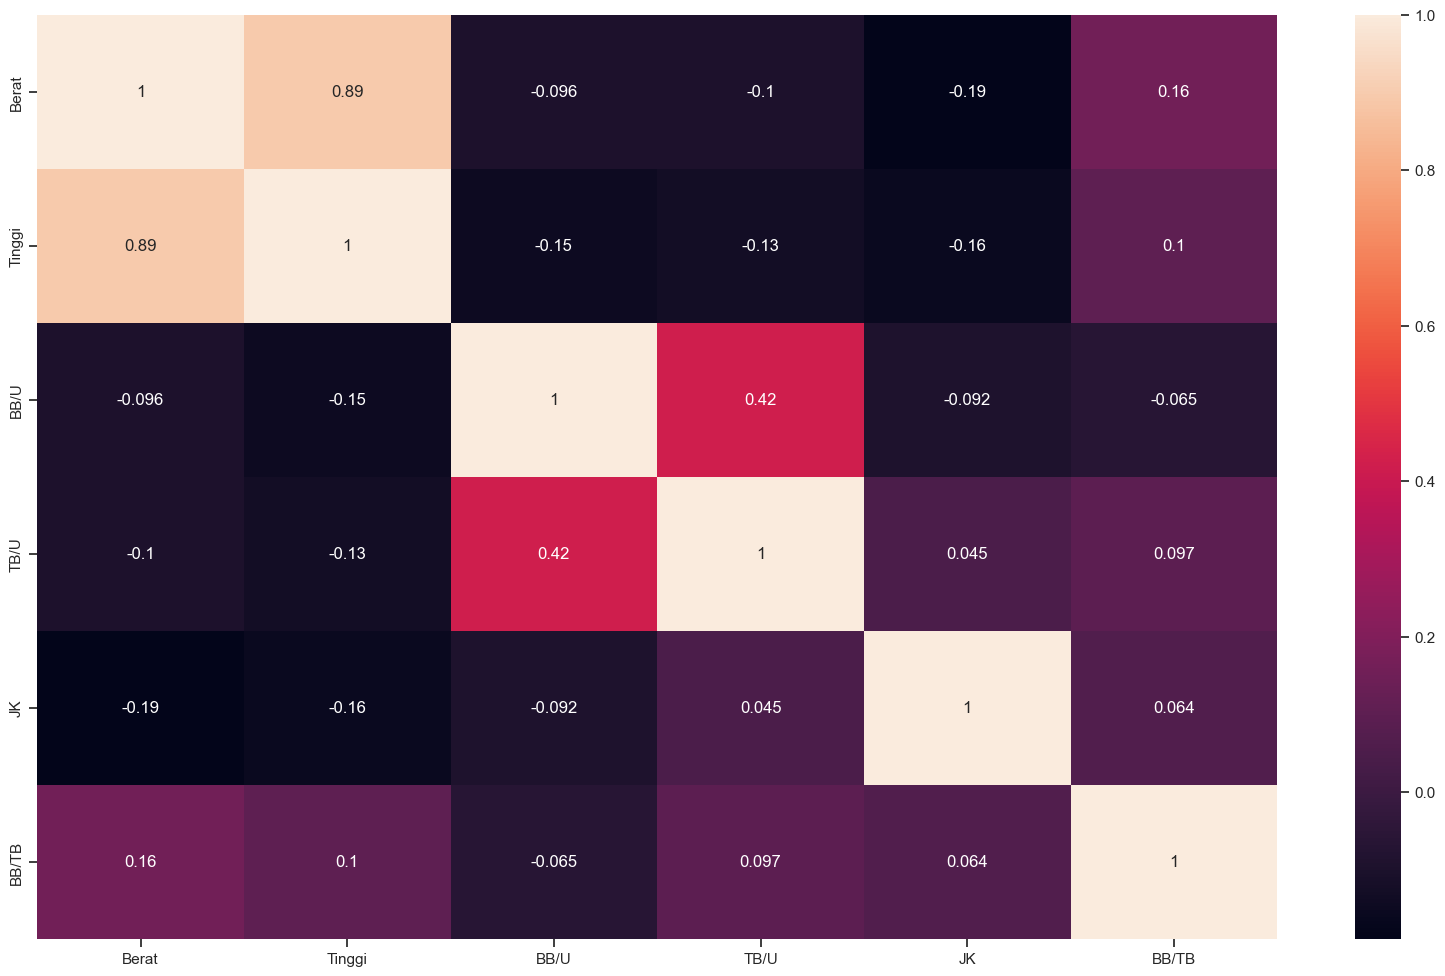

In [56]:
plt.figure(figsize=(20,12))
sns.heatmap(X_resampled.corr(), annot=True)

Train Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Menggunakan dataset contoh
# Misalnya, Anda memiliki data dalam DataFrame 'feature' dan 'target'

# Definisikan X dan y
X = feature[['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/U', 'TB/U', 'BB/TB', 'JK']]
y = feature['BB/TB']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Model Linear Regression (Contoh untuk ilustrasi)
print("Training Linear Regression...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluasi Linear Regression (Contoh, sebenarnya ini tidak tepat untuk regresi)
# Karena ini contoh regresi, Anda tidak menggunakan accuracy_score atau classification_report
# Tetapi untuk tujuan perbandingan, mari kita coba
print("Evaluasi Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

# 2. Model Naive Bayes
print("Training Naive Bayes...")
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
print("Evaluasi Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# 3. Model Neural Network
print("Training Neural Network...")
model_nn = MLPClassifier(random_state=42)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)

# Evaluasi Neural Network
print("Evaluasi Neural Network:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))


Training Linear Regression...
Evaluasi Linear Regression:
Mean Squared Error: 3.774445698530995e-30
Training Naive Bayes...
Evaluasi Naive Bayes:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       880
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        26

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962

Training Neural Network...
Evaluasi Neural Network:
Accuracy: 0.9968814968814969
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       880
           1       1.00      1.00      1.00         5
       

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
# Prediksi dengan model Linear Regression
y_pred_lr = model_lr.predict(X_test)
print("Prediksi Linear Regression:")
print(y_pred_lr)


Prediksi Linear Regression:
[-1.70913804e-15 -1.72038028e-16  1.05189459e-15 -3.69257310e-16
  2.66751308e-15  5.03754489e-15 -1.44257963e-15  4.06912774e-15
 -1.03218688e-16 -9.98117546e-16  1.24389513e-15  4.00000000e+00
 -2.03117488e-15 -1.03218688e-16  4.34314671e-15 -3.03455261e-15
 -4.62310022e-16 -1.66238725e-15  2.31309719e-15  9.46091665e-16
 -8.12381419e-16 -2.10288681e-16  1.97762567e-16  2.00000000e+00
  3.42140944e-15  1.53550510e-15  1.30518300e-15  2.86044702e-17
  2.26935008e-15  6.45234282e-16 -1.45026159e-15 -1.86467478e-15
 -1.86467478e-15  1.08880727e-15 -1.03465225e-15  2.00000000e+00
  6.63380590e-16  1.00939387e-15 -8.74936354e-16 -2.13101179e-15
  1.84519046e-15  3.93212941e-16 -6.84131973e-16  1.00000000e+00
 -1.42058200e-15  4.57764261e-16  2.60376199e-15  9.04787093e-16
 -1.44056530e-15  3.00000000e+00  4.73568398e-16  1.24739793e-15
 -2.00999543e-15 -1.06574073e-15 -2.56108729e-15 -8.80453489e-16
  6.80431015e-16 -8.94919653e-16  1.31189629e-15  3.33685688e-

In [59]:
# Prediksi dengan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)
print("Prediksi Naive Bayes:")
print(y_pred_nb)


Prediksi Naive Bayes:
[0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0
 0 0 0 3 5 0 0 0 0 0 0 0 2 0 5 0 0 0 0 0 5 0 0 0 0 0 0 0 2 0 0 0 0 0 0 5 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 3 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 0 3 0 0 0 1 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 5 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0
 0 

In [60]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)
print("Prediksi Neural Network:")
print(y_pred_nn)


Prediksi Neural Network:
[0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0
 0 0 0 3 5 0 0 0 0 0 0 0 2 0 5 0 0 0 0 0 5 0 0 0 0 0 0 0 2 0 0 0 0 0 0 5 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 3 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 0 3 0 0 0 1 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 5 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0


In [61]:
# Misalnya jika memerlukan threshold
threshold = 0.5
y_pred_lr = (y_pred_lr > threshold).astype(int)

# Menghitung skor akurasi Linear Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Skor akurasi Linear Regression:', accuracy_lr)


Skor akurasi Linear Regression: 0.91995841995842


In [62]:
# Menghitung skor akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Skor akurasi Naive Bayes:', accuracy_nb)


Skor akurasi Naive Bayes: 1.0


In [63]:
# Menghitung skor akurasi Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print('Skor akurasi Neural Network:', accuracy_nn)


Skor akurasi Neural Network: 0.997920997920998


In [64]:
# Prediksi dengan model Linear Regression
y_pred_lr_train = model_lr.predict(X_train)


In [65]:
# Prediksi dengan model Naive Bayes
y_pred_nb_train = model_nb.predict(X_train)


In [66]:
# Prediksi dengan model Neural Network
y_pred_nn_train = model_nn.predict(X_train)


In [67]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi dengan model Linear Regression
y_pred_lr = model_lr.predict(X_test)

# Evaluasi menggunakan mean squared error dan r2 score
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 3.774445698530995e-30
R-squared (R2) Score: 1.0


In [69]:
from sklearn.metrics import confusion_matrix

# Prediksi dengan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)

# Hitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Cetak confusion matrix
print("Confusion Matrix Naive Bayes:\n", cm_nb)


Confusion Matrix Naive Bayes:
 [[880   0   0   0   0   0]
 [  0   5   0   0   0   0]
 [  0   0  35   0   0   0]
 [  0   0   0  11   0   0]
 [  0   0   0   0   5   0]
 [  0   0   0   0   0  26]]


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prediksi dengan model Neural Network
y_pred_nn_probs = model_nn.predict(X_test)

# Pastikan bahwa y_pred_nn_probs memiliki dimensi yang benar
print("Shape y_pred_nn_probs:", y_pred_nn_probs.shape)

# Jika y_pred_nn_probs hanya memiliki satu dimensi, maka perlu dilakukan reshape
if len(y_pred_nn_probs.shape) == 1:
    y_pred_nn_probs = y_pred_nn_probs.reshape(-1, 1)

# Konversi hasil prediksi dari probabilitas ke kelas dengan argmax
y_pred_nn_classes = np.argmax(y_pred_nn_probs, axis=1)

# Hitung confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)

# Cetak confusion matrix
print('Confusion Matrix Neural Network:\n', cm_nn)

# Evaluasi menggunakan accuracy score
accuracy_nn = accuracy_score(y_test, y_pred_nn_classes)
print('Accuracy Neural Network:', accuracy_nn)


Shape y_pred_nn_probs: (962,)
Confusion Matrix Neural Network:
 [[880   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [ 35   0   0   0   0   0]
 [ 11   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [ 26   0   0   0   0   0]]
Accuracy Neural Network: 0.9147609147609148


In [71]:
from sklearn.metrics import mean_squared_error

# Hitung Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (MSE) untuk Linear Regression:", mse_lr)


Mean Squared Error (MSE) untuk Linear Regression: 3.774445698530995e-30


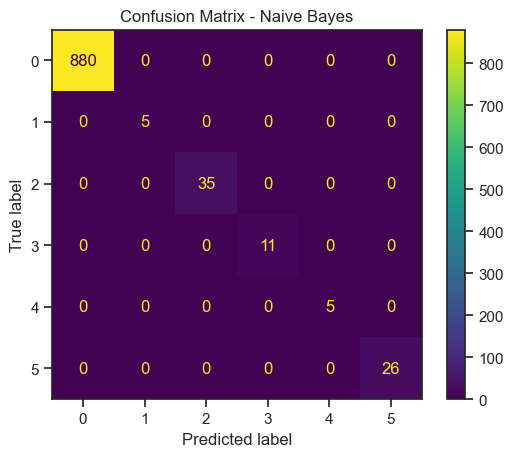

In [73]:
# Hitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Tampilkan confusion matrix dengan matplotlib
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


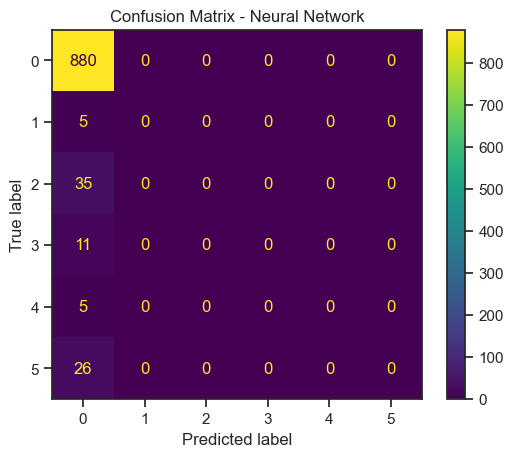

In [74]:
# Hitung confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)

# Tampilkan confusion matrix dengan matplotlib
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot()
plt.title('Confusion Matrix - Neural Network')
plt.show()


In [75]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluasi Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('1) Perbandingan Data Aktual dan Prediksi dengan Linear Regression')
df_lr = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_lr})
print(df_lr)
print(f'2) Mean Squared Error (MSE) untuk Linear Regression: {mse_lr}')



1) Perbandingan Data Aktual dan Prediksi dengan Linear Regression
      Actual       Predict
1456       0 -1.709138e-15
2944       0 -1.720380e-16
798        0  1.051895e-15
1036       0 -3.692573e-16
8          0  2.667513e-15
...      ...           ...
1027       0 -5.578969e-16
2815       0 -4.193604e-16
201        2  2.000000e+00
4445       0 -2.982731e-16
1496       3  3.000000e+00

[962 rows x 2 columns]
2) Mean Squared Error (MSE) untuk Linear Regression: 3.774445698530995e-30


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Prediksi dengan model Linear Regression
y_pred_lr = model_lr.predict(X_test)

# Evaluasi Linear Regression
print("Linear Regression:")
print("R^2 score : {} ".format(r2_score(y_test, y_pred_lr)))
print("Mean Squared Error : {} ".format(mean_squared_error(y_test, y_pred_lr)))


Linear Regression:
R^2 score : 1.0 
Mean Squared Error : 3.774445698530995e-30 


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Prediksi dengan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
print("Naive Bayes:")
print("Accuracy score : {} ".format(accuracy_score(y_test, y_pred_nb)))
print("Precision score : {} ".format(precision_score(y_test, y_pred_nb, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, y_pred_nb, average='macro')))


Naive Bayes:
Accuracy score : 1.0 
Precision score : 1.0 
Recall score : 1.0 


In [ ]:
# Prediksi dengan model Neural Network
y_pred_nn = model_nn.predict(X_test)

# Evaluasi Neural Network
print("Neural Network:")
print("Accuracy score : {} ".format(accuracy_score(y_test, y_pred_nn)))
print("Precision score : {} ".format(precision_score(y_test, y_pred_nn, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, y_pred_nn, average='macro')))



Neural Network:
Accuracy score : 0.997920997920998 
Precision score : 0.9891975308641975 
Recall score : 0.9515151515151515 


In [ ]:
# Definisikan X dan y
X = feature[['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/U', 'TB/U', 'BB/TB', 'JK']]
y = feature['BB/TB']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


# 1. Model Linear Regression (Contoh untuk ilustrasi)
print("Training Linear Regression...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

Training Linear Regression...


In [ ]:
# Evaluasi Linear Regression (Contoh, sebenarnya ini tidak tepat untuk regresi)
# Karena ini contoh regresi, Anda tidak menggunakan accuracy_score atau classification_report
# Tetapi untuk tujuan perbandingan, mari kita coba
print("Evaluasi Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

# 2. Model Naive Bayes
print("Training Naive Bayes...")
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
print("Evaluasi Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Evaluasi Linear Regression:
Mean Squared Error: 3.774445698530995e-30
Training Naive Bayes...
Evaluasi Naive Bayes:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       880
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        26

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962



In [76]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('1) Perbandingan Data Aktual dan Prediksi dengan Naive Bayes')
df_nb = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_nb})
print(df_nb)
print('2) Skor keakuratan dengan Naive Bayes:', accuracy_nb)


1) Perbandingan Data Aktual dan Prediksi dengan Naive Bayes
      Actual  Predict
1456       0        0
2944       0        0
798        0        0
1036       0        0
8          0        0
...      ...      ...
1027       0        0
2815       0        0
201        2        2
4445       0        0
1496       3        3

[962 rows x 2 columns]
2) Skor keakuratan dengan Naive Bayes: 1.0


In [77]:
# Neural Network
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)

# Evaluasi Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print('1) Perbandingan Data Aktual dan Prediksi dengan Neural Network')
df_nn = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_nn})
print(df_nn)
print('2) Skor keakuratan dengan Neural Network:', accuracy_nn)


1) Perbandingan Data Aktual dan Prediksi dengan Neural Network
      Actual  Predict
1456       0        0
2944       0        0
798        0        0
1036       0        0
8          0        0
...      ...      ...
1027       0        0
2815       0        0
201        2        2
4445       0        0
1496       3        3

[962 rows x 2 columns]
2) Skor keakuratan dengan Neural Network: 0.997920997920998


Mean Squared Error (MSE) for Linear Regression: 0.664143186963624
R2 Score for Linear Regression: 0.2938759414763794


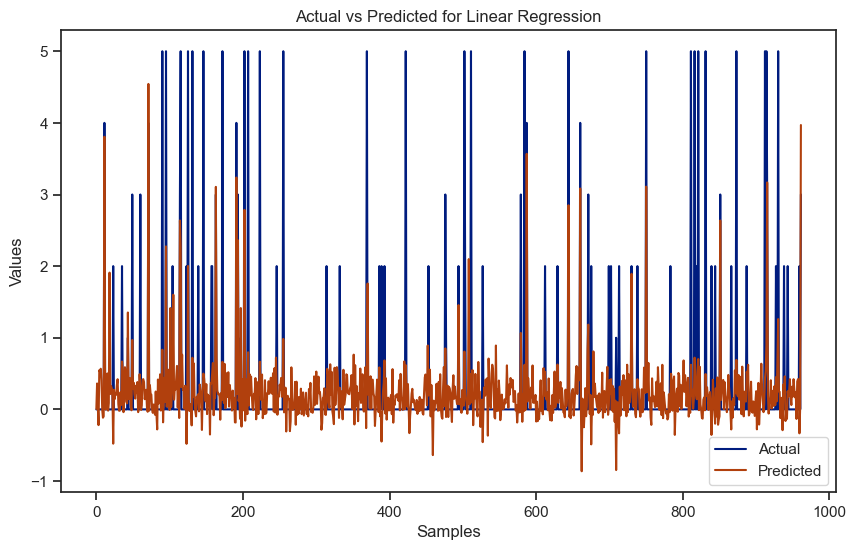

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression tidak memiliki hyperparameter yang umum untuk divariasikan seperti n_estimators pada Random Forest.
# Namun, untuk ilustrasi, kita bisa melihat performa dengan atau tanpa fitur tambahan.

# Menyiapkan data tambahan untuk ilustrasi
X_train_lr = X_train[['Berat', 'Tinggi', 'BB/U', 'TB/U']]
X_test_lr = X_test[['Berat', 'Tinggi', 'BB/U', 'TB/U']]

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)
y_pred_lr = model_lr.predict(X_test_lr)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Squared Error (MSE) for Linear Regression:", mse_lr)
print("R2 Score for Linear Regression:", r2_lr)

# Visualisasi hasil Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Actual vs Predicted for Linear Regression')
plt.legend()
plt.show()


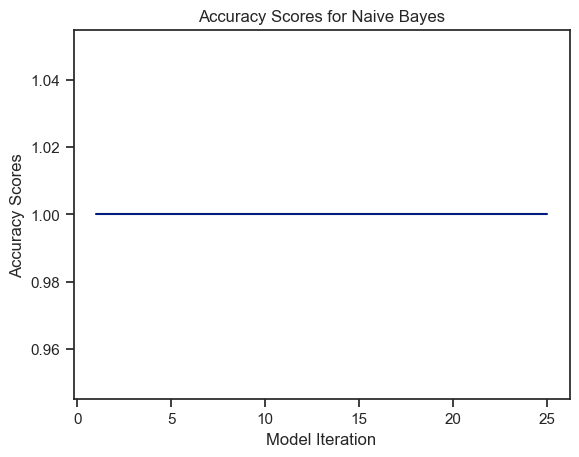

Accuracy Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Highest Accuracy: 1.0


In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Menyiapkan range model
model_range = list(range(1, 26))
scores_nb = []

for _ in model_range:
    model_nb = GaussianNB()
    model_nb.fit(X_train, y_train)
    y_pred_nb = model_nb.predict(X_test)
    
    # Evaluasi Naive Bayes
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    scores_nb.append(accuracy_nb)

plt.plot(model_range, scores_nb)
plt.xlabel('Model Iteration')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Naive Bayes')
plt.show()

print('Accuracy Scores:', scores_nb)
print('Highest Accuracy:', max(scores_nb))


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7295 - loss: 4.6867
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9411 - loss: 0.2662
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9528 - loss: 0.1812
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1369
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.1170
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9202 - loss: 0.4021
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9354 - loss: 0.2163
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.1774
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9657 - loss: 0.1252
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0823
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7719 - loss: 1.8714
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - loss: 0.2486
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9577 - loss: 0.1385
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.1187
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0732
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6680 - loss: 3.3867
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9225 - loss: 0.3307
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.2576
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - loss: 0.1877
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.1382
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7869 - loss: 1.4928
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9316 - loss: 0.2385
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9442 - loss: 0.1846
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1511
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9648 - loss: 0.1230
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9248 - loss: 0.4905
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.2270
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9524 - loss: 0.1621
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.1086
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.0895
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7234 - loss: 3.5436
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.3293
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.2007
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9462 - loss: 0.1631
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1396
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8017 - loss: 1.6682
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.2641
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - loss: 0.1967
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.1470
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1161
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7071 - loss: 4.1375
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9222 - loss: 0.2759
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9370 - loss: 0.2273
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9472 - loss: 0.1899
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1696
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8473 - loss: 0.9217
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9284 - loss: 0.2681
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.2225
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9488 - loss: 0.1644
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9556 - loss: 0.1398
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7968 - loss: 1.2164
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.2286
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: 0.1479
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9646 - loss: 0.1375
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.0973
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6644 - loss: 5.6764
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9310 - loss: 0.2544
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9336 - loss: 0.2137
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9522 - loss: 0.1697
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.1286
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8560 - loss: 0.9480
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9201 - loss: 0.2886
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.1978
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9607 - loss: 0.1272
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.0939
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7963 - loss: 1.9123
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2806
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9423 - loss: 0.1820
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9545 - loss: 0.1393
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1086
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9048 - loss: 0.7067
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9406 - loss: 0.2143
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9491 - loss: 0.1596
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1332
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0995
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7612 - loss: 2.4568
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9396 - loss: 0.2255
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 0.1508
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.1416
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9734 - loss: 0.0886
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7307 - loss: 3.4926
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9216 - loss: 0.2620
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9491 - loss: 0.1808
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.1496
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1186
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8804 - loss: 0.9048
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9467 - loss: 0.2082
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9508 - loss: 0.1852
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1258
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.1082
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7968 - loss: 1.9378
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9271 - loss: 0.3155
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1852
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9666 - loss: 0.1257
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9715 - loss: 0.1062
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8167 - loss: 2.0095
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.2692
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - loss: 0.1594
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9567 - loss: 0.1342
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.1115
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6708 - loss: 5.6288
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.2470
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9475 - loss: 0.1901
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9599 - loss: 0.1373
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.1055
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7928 - loss: 1.8582
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.2893
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9278 - loss: 0.2559
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9432 - loss: 0.1983
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9573 - loss: 0.1437
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8874 - loss: 0.5090
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9330 - loss: 0.2347
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9429 - loss: 0.1753
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9556 - loss: 0.1323
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9640 - loss: 0.1191
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7778 - loss: 1.5326
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 0.2536
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.1853
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9560 - loss: 0.1474
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.1027
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7932 - loss: 1.7499
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.2316
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.1667
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1130
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.1017
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


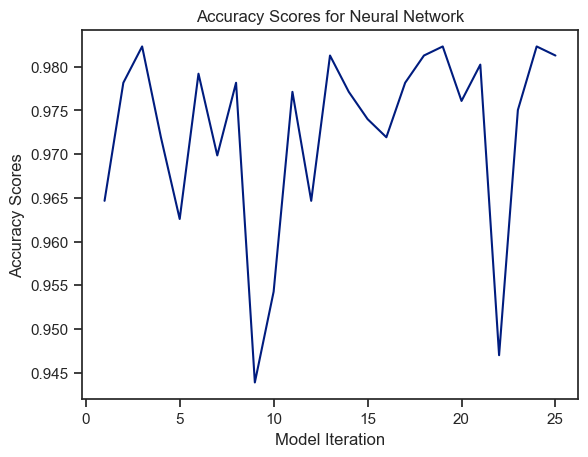

Accuracy Scores: [0.9646569646569647, 0.9781704781704782, 0.9823284823284824, 0.9719334719334719, 0.9625779625779626, 0.9792099792099792, 0.9698544698544699, 0.9781704781704782, 0.9438669438669439, 0.9542619542619543, 0.9771309771309772, 0.9646569646569647, 0.9812889812889813, 0.9771309771309772, 0.974012474012474, 0.9719334719334719, 0.9781704781704782, 0.9812889812889813, 0.9823284823284824, 0.9760914760914761, 0.9802494802494802, 0.946985446985447, 0.975051975051975, 0.9823284823284824, 0.9812889812889813]
Highest Accuracy: 0.9823284823284824


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Konversi target ke one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Menyiapkan range model
model_range = list(range(1, 26))
scores_nn = []

for _ in model_range:
    # Training Neural Network
    model_nn = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])

    model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_nn.fit(X_train, y_train_categorical, epochs=5, batch_size=32, verbose=1)
    
    # Prediksi dengan Neural Network
    y_pred_nn = model_nn.predict(X_test)
    y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
    
    # Evaluasi Neural Network
    accuracy_nn = accuracy_score(y_test, y_pred_nn_classes)
    scores_nn.append(accuracy_nn)

plt.plot(model_range, scores_nn)
plt.xlabel('Model Iteration')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Neural Network')
plt.show()

print('Accuracy Scores:', scores_nn)
print('Highest Accuracy:', max(scores_nn))


In [84]:
import pickle

In [91]:
import pickle

# Simpan model Linear Regression
filename_lr = 'model_lr.sav'
pickle.dump(model_lr, open(filename_lr, 'wb'))

# Simpan model Naive Bayes
filename_nb = 'model_nb.sav'
pickle.dump(model_nb, open(filename_nb, 'wb'))

# Simpan model Neural Network
filename_nn = 'model_nn.sav'
pickle.dump(model_nn, open(filename_nn, 'wb'))
